In [1]:
%matplotlib inline
from taxi_pakage import *
taxi = pd.read_csv("edited_train.csv")

In [2]:
# 날씨 데이터 생성
weather_event = ['20160110', '20160113', '20160117', '20160123', '20160205', '20160208', '20160215', '20160216',
                 '20160224', '20160225', '20160314', '20160315', '20160328', '20160329', '20160403', '20160404',
                 '20160530', '20160628']

weather_event = pd.Series(pd.to_datetime(weather_event, format = '%Y%m%d')).dt.date
weather_event = weather_event.astype('<U32')
weather_event = list(weather_event)

taxi["y-m-d"] = pd.to_datetime(taxi["pickup_datetime"]).apply(lambda x: x.strftime("%Y-%m-%d"))
taxi["extreme_weather"] = taxi["y-m-d"].apply(lambda x: 1 if x in weather_event else 0)
taxi["weather_event"] = taxi["extreme_weather"] # 날씨 (1:자연재해,  0:자연재해X)
taxi.drop(['y-m-d', 'extreme_weather'], axis=1, inplace=True)

In [3]:
taxi['sqrt_log_dist'] = taxi['dist'].apply(lambda x: np.sqrt(np.log1p(x)))
taxi['cbrt_log_dist'] = taxi['dist'].apply(lambda x: np.cbrt(np.log1p(x)))
taxi['log_duration'] = taxi['trip_duration'].apply(lambda x: np.log1p(x))

In [4]:
taxi['velo'] = taxi['dist']/taxi['trip_duration']*3600 # 시속
taxi['no_passenger'] = taxi['passenger_count'].apply(lambda x: 1 if x == 0 else 0)

In [5]:
# 아웃라이어 제거
taxi = taxi[taxi['trip_duration'] < 1500000].reset_index(drop=True)
taxi = taxi[taxi['velo']<100]

---

# model
### kaggle_ 0.48665 - 768/1257 (61%)

In [6]:
model1 = sm.OLS.from_formula("log_duration ~ \
                               scale(sqrt_log_dist)*C(vendor_id)\
                             + scale(sqrt_log_dist)*C(work)\
                             + C(weekday)\
                             + C(hour)\
                             + scale(sqrt_log_dist)*scale(weather_event)\
                             + scale(month)\
                             +0", data = taxi)
result = model1.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           log_duration   R-squared:                       0.634
Model:                            OLS   Adj. R-squared:                  0.634
Method:                 Least Squares   F-statistic:                 6.830e+04
Date:                Sun, 18 Mar 2018   Prob (F-statistic):               0.00
Time:                        18:23:12   Log-Likelihood:            -1.0011e+06
No. Observations:             1458465   AIC:                         2.002e+06
Df Residuals:                 1458427   BIC:                         2.003e+06
Df Model:                          37                                         
Covariance Type:            nonrobust                                         
=============================================================================================================
                                                coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------
C(vendor_id)[1]                               6.1793      0.002   2487.639      0.000       6.174       6.184
C(vendor_id)[2]                               6.2008      0.002   2505.863      0.000       6.196       6.206
C(work)[T.1]                                  0.2397      0.002    125.255      0.000       0.236       0.243
C(weekday)[T.1]                               0.0898      0.002     58.155      0.000       0.087       0.093
C(weekday)[T.2]                               0.1134      0.002     73.466      0.000       0.110       0.116
C(weekday)[T.3]                               0.1227      0.002     79.713      0.000       0.120       0.126
C(weekday)[T.4]                               0.1101      0.002     71.679      0.000       0.107       0.113
C(weekday)[T.5]                               0.1745      0.002     86.811      0.000       0.171       0.178
C(weekday)[T.6]                               0.0875      0.002     42.750      0.000       0.084       0.092
C(hour)[T.1]                                 -0.0461      0.003    -14.343      0.000      -0.052      -0.040
C(hour)[T.2]                                 -0.0842      0.004    -23.674      0.000      -0.091      -0.077
C(hour)[T.3]                                 -0.1220      0.004    -31.024      0.000      -0.130      -0.114
C(hour)[T.4]                                 -0.1780      0.004    -40.845      0.000      -0.187      -0.169
C(hour)[T.5]                                 -0.2779      0.004    -62.374      0.000      -0.287      -0.269
C(hour)[T.6]                                 -0.1807      0.003    -53.194      0.000      -0.187      -0.174
C(hour)[T.7]                                  0.0659      0.003     22.235      0.000       0.060       0.072
C(hour)[T.8]                                  0.0433      0.003     14.114      0.000       0.037       0.049
C(hour)[T.9]                                  0.0891      0.003     29.261      0.000       0.083       0.095
C(hour)[T.10]                                 0.0946      0.003     31.075      0.000       0.089       0.101
C(hour)[T.11]                                 0.1291      0.003     42.867      0.000       0.123       0.135
C(hour)[T.12]                                 0.1433      0.003     48.042      0.000       0.137       0.149
C(hour)[T.13]                                 0.1368      0.003     45.822      0.000       0.131       0.143
C(hour)[T.14]                                 0.1479      0.003     49.798      0.000       0.142       0.154
C(hour)[T.15]                                 0.1516      0.003     50.788      0.000       0.146       0.158
C(hour)[T.16]                                 0.1167      0.003     38.337      0.000       0.111       0.123
C(h

## cross validation

In [10]:
score, result_set = cross_validater("log_duration ~ \
                               scale(sqrt_log_dist)*C(vendor_id)\
                             + scale(sqrt_log_dist)*C(work)\
                             + C(weekday)\
                             + C(hour)\
                             + scale(sqrt_log_dist)*scale(weather_event)\
                             + scale(month)\
                             +0", taxi, 3, r_seed=3, target_log=True)

MemoryError: 

In [ ]:
result_set

In [ ]:
score

---

## Kaggle

In [7]:
test = pd.read_csv("edited_test.csv")
test['sqrt_log_dist'] = test['dist'].apply(lambda x: np.sqrt(np.log1p(x)))

In [8]:
# 테스트 데이터를 통해 y값 예측
y_hat = result.predict(test)
y_hat = y_hat.apply(lambda x: int(round(np.exp(x))))
ans = pd.concat([test['id'], y_hat], axis=1)
ans.rename(columns={'id':'id' , 0:'trip_duration'}, inplace=True)
ans.tail()

,id,trip_duration
625129,id3008929,287
625130,id3700764,1080
625131,id2568735,1305
625132,id1384355,2371
625133,id0621643,1022


In [9]:
# Kaggle 제출파일
ans.to_csv('basic_model.csv', index=False)

### 0.48665 - 768/1257 (61%)

---

---

## dist

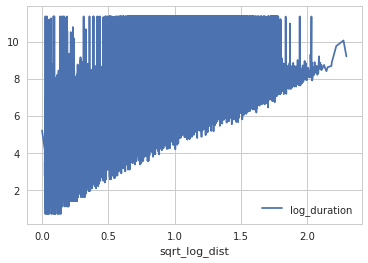

In [9]:
a = taxi.pivot_table("log_duration", "sqrt_log_dist", aggfunc='mean')
a.plot()

In [7]:
results = pd.DataFrame(columns = ["R-square", "AIC", "BIC", "Cond.No.", "Pb(Fstatics)", "Pb(omnibus)", "Pb(jb)", "Dub-Wat","Remarks"])

model1 = sm.OLS.from_formula("log_duration ~ scale(sqrt_log_dist)", data = taxi)
result1 = model1.fit()
storage(result1, results, 'scale_sqrt_log_dist')

model1 = sm.OLS.from_formula("log_duration ~ scale(cbrt_log_dist)", data = taxi)
result1 = model1.fit()
storage(result1, results, 'scale_cbrt_log_dist')

model1 = sm.OLS.from_formula("log_duration ~ scale(sqrt_log_dist)", data = filtered)
result1 = model1.fit()
storage(result1, results, 'f~scale_sqrt_log_dist')

model1 = sm.OLS.from_formula("log_duration ~ scale(cbrt_log_dist)", data = filtered)
result1 = model1.fit()
storage(result1, results, 'f~scale_cbrt_log_dist')

results

,R-square,AIC,BIC,Cond.No.,Pb(Fstatics),Pb(omnibus),Pb(jb),Dub-Wat,Remarks
0,0.589,2171275.806,2171300.191,1.0,0.0,0.0,0.0,1.998,scale_sqrt_log_dist
1,0.570,2236842.887,2236867.272,1.0,0.0,0.0,0.0,1.999,scale_cbrt_log_dist
2,0.713,1397137.643,1397161.928,1.0,0.0,0.0,0.0,1.999,f~scale_sqrt_log_dist
3,0.723,1347583.573,1347607.859,1.0,0.0,0.0,0.0,1.998,f~scale_cbrt_log_dist


아웃라이어를 제거한 상태에서는 cbrt가 더 좋음

## work

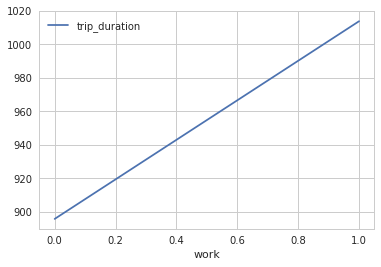

In [15]:
a = taxi.pivot_table("trip_duration", "work", aggfunc='mean')
a.plot()

In [10]:
results = pd.DataFrame(columns = ["R-square", "AIC", "BIC", "Cond.No.", "Pb(Fstatics)", "Pb(omnibus)", "Pb(jb)", "Dub-Wat","Remarks"])

model1 = sm.OLS.from_formula("log_duration ~ scale(sqrt_log_dist) + C(work)", data = taxi)
result1 = model1.fit()
storage(result1, results, 'C(work)')

model1 = sm.OLS.from_formula("log_duration ~ scale(sqrt_log_dist) + scale(work)", data = taxi)
result1 = model1.fit()
storage(result1, results, 'sqrt dist + scale(work)')

model1 = sm.OLS.from_formula("log_duration ~ scale(sqrt_log_dist)*scale(work)", data = taxi)
result1 = model1.fit()
storage(result1, results, 'sqrt dist*scale(work)')


model1 = sm.OLS.from_formula("log_duration ~ scale(sqrt_log_dist)*C(work)", data = taxi)
result1 = model1.fit()
storage(result1, results, 'sqrt dist*C(work)')

results

,R-square,AIC,BIC,Cond.No.,Pb(Fstatics),Pb(omnibus),Pb(jb),Dub-Wat,Remarks
0,0.617,2070598.495,2070635.074,2.597,0.0,0.0,0.0,1.998,C(work)
1,0.617,2070598.495,2070635.074,1.096,0.0,0.0,0.0,1.998,sqrt dist + scale(work)
2,0.617,2069995.948,2070044.719,1.113,0.0,0.0,0.0,1.998,sqrt dist*scale(work)
3,0.617,2069995.948,2070044.719,2.677,0.0,0.0,0.0,1.998,sqrt dist*C(work)


## weather_event

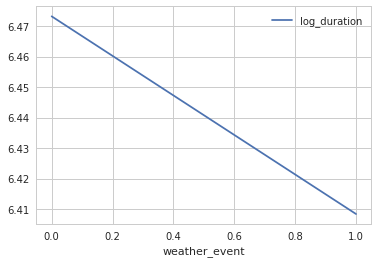

In [13]:
a = taxi.pivot_table("log_duration", "weather_event", aggfunc='mean')
a.plot()

In [14]:
results = pd.DataFrame(columns = ["R-square", "AIC", "BIC", "Cond.No.", "Pb(Fstatics)", "Pb(omnibus)", "Pb(jb)", "Dub-Wat","Remarks"])

model1 = sm.OLS.from_formula("log_duration ~ scale(sqrt_log_dist) + C(weather_event)", data = taxi)
result1 = model1.fit()
storage(result1, results, 'C(weather_event)')

model1 = sm.OLS.from_formula("log_duration ~ scale(sqrt_log_dist) + scale(weather_event)", data = taxi)
result1 = model1.fit()
storage(result1, results, 'sqrt dist + scale(weather_event)')

model1 = sm.OLS.from_formula("log_duration ~ scale(sqrt_log_dist)*scale(weather_event)", data = taxi)
result1 = model1.fit()
storage(result1, results, 'sqrt dist*scale(weather_event)')


model1 = sm.OLS.from_formula("log_duration ~ scale(sqrt_log_dist)*C(weather_event)", data = taxi)
result1 = model1.fit()
storage(result1, results, 'sqrt dist*C(weather_event)')

results

,R-square,AIC,BIC,Cond.No.,Pb(Fstatics),Pb(omnibus),Pb(jb),Dub-Wat,Remarks
0,0.589,2170157.150,2170193.728,3.504,0.0,0.0,0.0,1.999,C(weather_event)
1,0.589,2170157.150,2170193.728,1.008,0.0,0.0,0.0,1.999,sqrt dist + scale(weather_event)
2,0.589,2170145.082,2170193.853,1.025,0.0,0.0,0.0,1.999,sqrt dist*scale(weather_event)
3,0.589,2170145.082,2170193.853,3.531,0.0,0.0,0.0,1.999,sqrt dist*C(weather_event)


## weekday

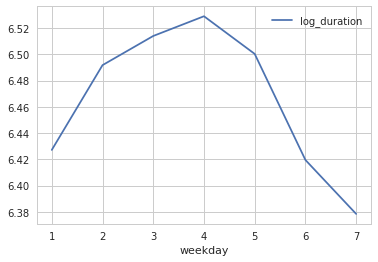

In [22]:
a = taxi.pivot_table("log_duration", "weekday", aggfunc='mean')
a.plot()

In [27]:
# origin data model
model = sm.OLS.from_formula("log_duration ~ scale(weekday) +scale(weekday**2) +scale(weekday**3) + scale(weekday**4) +scale(weekday**5) +scale(weekday**6)+scale(weekday**7) + scale(weekday**8) + scale(weekday**9)", data = taxi)
result2 = model.fit_regularized(alpha=0.001, L1_wt=1)
print(result2.params)

Intercept              6.466458
scale(weekday)         0.086116
scale(weekday ** 2)   -0.032375
scale(weekday ** 3)   -0.063171
scale(weekday ** 4)   -0.021102
scale(weekday ** 5)    0.000000
scale(weekday ** 6)    0.000000
scale(weekday ** 7)    0.000000
scale(weekday ** 8)    0.000000
scale(weekday ** 9)    0.000000
dtype: float64


In [16]:
results = pd.DataFrame(columns = ["R-square", "AIC", "BIC", "Cond.No.", "Pb(Fstatics)", "Pb(omnibus)", "Pb(jb)", "Dub-Wat","Remarks"])

model1 = sm.OLS.from_formula("log_duration ~ scale(sqrt_log_dist) + C(weekday)", data = taxi)
result1 = model1.fit()
storage(result1, results, 'C(weekday)')

model1 = sm.OLS.from_formula("log_duration ~ scale(sqrt_log_dist)*C(weekday)", data = taxi)
result1 = model1.fit()
storage(result1, results, 'sqrt dist*C(weekday)')

model1 = sm.OLS.from_formula("log_duration ~ scale(sqrt_log_dist) +scale(weekday) +scale(weekday**2)", data = taxi)
result1 = model1.fit()
storage(result1, results, 'sqrt dist +  s(weekday**1,2) ')

model1 = sm.OLS.from_formula("log_duration ~ scale(sqrt_log_dist) + scale(weekday**2)", data = taxi)
result1 = model1.fit()
storage(result1, results, 'sqrt dist *scale(weekday**2)')

model1 = sm.OLS.from_formula("log_duration ~ scale(sqrt_log_dist) + scale(weekday)", data = taxi)
result1 = model1.fit()
storage(result1, results, 'sqrt dist *scale(weekday)')

results

,R-square,AIC,BIC,Cond.No.,Pb(Fstatics),Pb(omnibus),Pb(jb),Dub-Wat,Remarks
0,0.597,2143007.932,2143105.475,8.265,0.0,0.0,0.0,1.999,C(weekday)
1,0.597,2142853.484,2143024.184,8.274,0.0,0.0,0.0,1.999,sqrt dist*C(weekday)
2,0.597,2143317.592,2143366.364,7.049,0.0,0.0,0.0,1.999,"sqrt dist + s(weekday**1,2)"
3,0.593,2157243.384,2157279.963,1.026,0.0,0.0,0.0,1.999,sqrt dist *scale(weekday**2)
4,0.591,2164716.751,2164753.330,1.020,0.0,0.0,0.0,1.998,sqrt dist *scale(weekday)


## month

In [9]:
# origin data model
model = sm.OLS.from_formula("log_duration ~ scale(month) +scale(month**2) +scale(month**3) + scale(month**4) +scale(month**5) +scale(month**6)+scale(month**7) + scale(month**8) + scale(month**9)", data = taxi)
result2 = model.fit_regularized(alpha=0.01, L1_wt=1)
print(result2.params)

Intercept            6.457458
scale(month)         0.026241
scale(month ** 2)    0.000968
scale(month ** 3)    0.000000
scale(month ** 4)    0.000000
scale(month ** 5)    0.000000
scale(month ** 6)    0.000000
scale(month ** 7)    0.000000
scale(month ** 8)    0.000000
scale(month ** 9)    0.000000
dtype: float64


In [17]:
results = pd.DataFrame(columns = ["R-square", "AIC", "BIC", "Cond.No.", "Pb(Fstatics)", "Pb(omnibus)", "Pb(jb)", "Dub-Wat","Remarks"])

result1 = sm.OLS.from_formula("log_duration ~ scale(sqrt_log_dist) + C(month)", data = taxi).fit()
storage(result1, results, 'sqrt dist +  C(month)')

result1 = sm.OLS.from_formula("log_duration ~ scale(sqrt_log_dist)*C(month)", data = taxi).fit()
storage(result1, results, 'sqrt dist *C(month)')

model1 = sm.OLS.from_formula("log_duration ~ scale(sqrt_log_dist) + scale(month)", data = taxi)
result1 = model1.fit()
storage(result1, results, 'sqrt dist +  s(month)')

model1 = sm.OLS.from_formula("log_duration ~ scale(sqrt_log_dist) + scale(month**2)", data = taxi)
result1 = model1.fit()
storage(result1, results, 'sqrt dist +  s(month**2)')

model1 = sm.OLS.from_formula("log_duration ~ scale(sqrt_log_dist)*scale(month)", data = taxi)
result1 = model1.fit()
storage(result1, results, 'sqrt dist * s(month)')



results

,R-square,AIC,BIC,Cond.No.,Pb(Fstatics),Pb(omnibus),Pb(jb),Dub-Wat,Remarks
0,0.59,2167454.484,2167539.834,7.033,0.0,0.0,0.0,1.999,sqrt dist + C(month)
1,0.59,2167193.226,2167339.540,7.114,0.0,0.0,0.0,1.999,sqrt dist *C(month)
2,0.59,2167598.874,2167635.453,1.019,0.0,0.0,0.0,1.999,sqrt dist + s(month)
3,0.59,2167646.955,2167683.534,1.019,0.0,0.0,0.0,1.999,sqrt dist + s(month**2)
4,0.59,2167425.228,2167474.000,1.025,0.0,0.0,0.0,1.999,sqrt dist * s(month)


## day

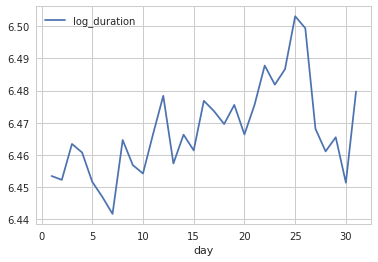

In [8]:
a = taxi.pivot_table("log_duration", "day", aggfunc='mean')
a.plot()

In [6]:
# origin data model
model = sm.OLS.from_formula("log_duration ~ scale(day) +scale(day**2) +scale(day**3) + scale(day**4) +scale(day**5) +scale(day**6)+scale(day**7) + scale(day**8) + scale(day**9)", data = taxi)
result2 = model.fit_regularized(alpha=0.01, L1_wt=1)
print(result2.params)

Intercept          6.45734
scale(day)         0.00000
scale(day ** 2)    0.00000
scale(day ** 3)    0.00000
scale(day ** 4)    0.00000
scale(day ** 5)    0.00000
scale(day ** 6)    0.00000
scale(day ** 7)    0.00000
scale(day ** 8)    0.00000
scale(day ** 9)    0.00000
dtype: float64


In [7]:
results = pd.DataFrame(columns = ["R-square", "AIC", "BIC", "Cond.No.", "Pb(Fstatics)", "Pb(omnibus)", "Pb(jb)", "Dub-Wat","Remarks"])

model1 = sm.OLS.from_formula("log_duration ~ scale(sqrt_log_dist) + scale(day)", data = taxi)
result1 = model1.fit()
storage(result1, results, 'sqrt dist +  s(day)')

model1 = sm.OLS.from_formula("log_duration ~ scale(sqrt_log_dist) + scale(day**2)", data = taxi)
result1 = model1.fit()
storage(result1, results, 'sqrt dist +  s(day**2)')


results

,R-square,AIC,BIC,Cond.No.,Pb(Fstatics),Pb(omnibus),Pb(jb),Dub-Wat,Remarks
0,0.589,2171215.201,2171251.779,1.008,0.0,0.0,0.0,1.999,sqrt dist + s(day)
1,0.589,2171253.349,2171289.928,1.009,0.0,0.0,0.0,1.998,sqrt dist + s(day**2)


## hour

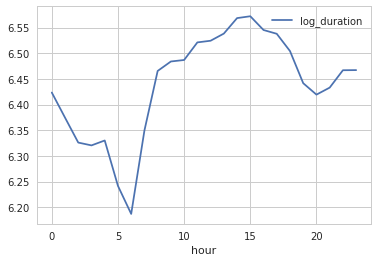

In [14]:
a = taxi.pivot_table("log_duration", "hour", aggfunc='mean')
a.plot()

In [16]:
# origin data model
model = sm.OLS.from_formula("log_duration ~ scale(hour) +scale(hour**2) +scale(hour**3) + scale(hour**4) +scale(hour**5) +scale(hour**6)+scale(hour**7) + scale(hour**8) + scale(hour**9)", data = taxi)
result2 = model.fit_regularized(alpha=0.001, L1_wt=1)
print(result2.params)

Intercept           6.466458
scale(hour)         0.107375
scale(hour ** 2)    0.000000
scale(hour ** 3)   -0.030961
scale(hour ** 4)   -0.048082
scale(hour ** 5)   -0.008822
scale(hour ** 6)    0.000000
scale(hour ** 7)    0.000000
scale(hour ** 8)    0.000000
scale(hour ** 9)    0.000000
dtype: float64


In [11]:
results = pd.DataFrame(columns = ["R-square", "AIC", "BIC", "Cond.No.", "Pb(Fstatics)", "Pb(omnibus)", "Pb(jb)", "Dub-Wat","Remarks"])

# origin data model
model1 = sm.OLS.from_formula("log_duration ~ scale(sqrt_log_dist) + C(hour)", data = taxi)
result1 = model1.fit()
storage(result1, results, 'sqrt dist +  C(hour)')

# origin data model
model1 = sm.OLS.from_formula("log_duration ~ scale(sqrt_log_dist) + scale(hour) + scale(hour**4)", data = taxi)
result1 = model1.fit()
storage(result1, results, 'sqrt dist +  s(hour**1, 4)')

# origin data model
model1 = sm.OLS.from_formula("log_duration ~ scale(sqrt_log_dist)*scale(hour)", data = taxi)
result1 = model1.fit()
storage(result1, results, 'sqrt dist * scale(hour)')

# origin data model
model1 = sm.OLS.from_formula("log_duration ~ scale(sqrt_log_dist)*C(hour)", data = taxi)
result1 = model1.fit()
storage(result1, results, 'sqrt dist * C(hour)')

results

,R-square,AIC,BIC,Cond.No.,Pb(Fstatics),Pb(omnibus),Pb(jb),Dub-Wat,Remarks
0,0.621,2053322.741,2053627.563,26.864,0.0,0.0,0.0,1.998,sqrt dist + C(hour)
1,0.611,2091694.467,2091743.238,3.762,0.0,0.0,0.0,1.998,"sqrt dist + s(hour**1, 4)"
2,0.592,2162542.673,2162591.445,1.130,0.0,0.0,0.0,1.998,sqrt dist * scale(hour)
3,0.622,2049302.413,2049887.672,29.158,0.0,0.0,0.0,1.998,sqrt dist * C(hour)


interaction은 다른 변수랑 같이 넣으면 너무 많아져서 에러남


---

## store

In [8]:
results = pd.DataFrame(columns = ["R-square", "AIC", "BIC", "Cond.No.", "Pb(Fstatics)", "Pb(omnibus)", "Pb(jb)", "Dub-Wat","Remarks"])

model1 = sm.OLS.from_formula("log_duration ~ scale(sqrt_log_dist) + C(store_and_fwd_flag) +0", data = taxi)
result1 = model1.fit()
storage(result1, results, 'sqrt dist + C(store_and_fwd_flag)')

model1 = sm.OLS.from_formula("log_duration ~ scale(sqrt_log_dist):C(store_and_fwd_flag) +0", data = taxi)
result1 = model1.fit()
storage(result1, results, 'sqrt dist : C(store_and_fwd_flag)')

model1 = sm.OLS.from_formula("log_duration ~ scale(sqrt_log_dist)*C(store_and_fwd_flag) +0", data = taxi)
result1 = model1.fit()
storage(result1, results, 'sqrt dist * C(store_and_fwd_flag)')

model1 = sm.OLS.from_formula("log_duration ~ scale(sqrt_log_dist)/C(store_and_fwd_flag) +0", data = taxi)
result1 = model1.fit()
storage(result1, results, 'sqrt dist / C(store_and_fwd_flag)')

model1 = sm.OLS.from_formula("log_duration ~ scale(sqrt_log_dist) + store_and_fwd_flag", data = taxi)
result1 = model1.fit()
storage(result1, results, 'sqrt dist + store_and_fwd_flag')

results

,R-square,AIC,BIC,Cond.No.,Pb(Fstatics),Pb(omnibus),Pb(jb),Dub-Wat,Remarks
0,0.589,2169900.256,2169936.835,13.470,0.0,0.0,0.0,1.999,sqrt dist + C(store_and_fwd_flag)
1,0.009,9592499.455,9592523.840,10.754,0.0,0.0,0.0,0.013,sqrt dist : C(store_and_fwd_flag)
2,0.589,2169799.699,2169848.471,14.158,0.0,0.0,0.0,1.999,sqrt dist * C(store_and_fwd_flag)
3,0.009,9592499.455,9592523.840,10.848,0.0,0.0,0.0,0.013,sqrt dist / C(store_and_fwd_flag)
4,0.589,2169900.256,2169936.835,13.506,0.0,0.0,0.0,1.999,sqrt dist + store_and_fwd_flag


## vendor_id

In [9]:
results = pd.DataFrame(columns = ["R-square", "AIC", "BIC", "Cond.No.", "Pb(Fstatics)", "Pb(omnibus)", "Pb(jb)", "Dub-Wat","Remarks"])

model1 = sm.OLS.from_formula("log_duration ~ scale(sqrt_log_dist) + C(vendor_id) +0", data = taxi)
result1 = model1.fit()
storage(result1, results, 'sqrt dist + C(vendor_id)')

model1 = sm.OLS.from_formula("log_duration ~ scale(sqrt_log_dist):C(vendor_id) +0", data = taxi)
result1 = model1.fit()
storage(result1, results, 'sqrt dist : C(vendor_id)')

model1 = sm.OLS.from_formula("log_duration ~ scale(sqrt_log_dist)*C(vendor_id) +0", data = taxi)
result1 = model1.fit()
storage(result1, results, 'sqrt dist * C(vendor_id)')

model1 = sm.OLS.from_formula("log_duration ~ scale(sqrt_log_dist)/C(vendor_id) +0", data = taxi)
result1 = model1.fit()
storage(result1, results, 'sqrt dist / C(vendor_id)')

model1 = sm.OLS.from_formula("log_duration ~ scale(sqrt_log_dist) + vendor_id", data = taxi)
result1 = model1.fit()
storage(result1, results, 'sqrt dist + vendor_id')

results

,R-square,AIC,BIC,Cond.No.,Pb(Fstatics),Pb(omnibus),Pb(jb),Dub-Wat,Remarks
0,0.589,2169134.407,2169170.985,1.466,0.0,0.0,0.0,1.999,sqrt dist + C(vendor_id)
1,0.009,9592824.389,9592848.775,1.080,0.0,0.0,0.0,0.012,sqrt dist : C(vendor_id)
2,0.590,2166682.894,2166731.665,2.718,0.0,0.0,0.0,1.999,sqrt dist * C(vendor_id)
3,0.009,9592824.389,9592848.775,2.718,0.0,0.0,0.0,0.012,sqrt dist / C(vendor_id)
4,0.589,2169134.407,2169170.985,7.086,0.0,0.0,0.0,1.999,sqrt dist + vendor_id


## no_passenger

In [10]:
results = pd.DataFrame(columns = ["R-square", "AIC", "BIC", "Cond.No.", "Pb(Fstatics)", "Pb(omnibus)", "Pb(jb)", "Dub-Wat","Remarks"])

model1 = sm.OLS.from_formula("log_duration ~ scale(sqrt_log_dist) + C(no_passenger) +0", data = taxi)
result1 = model1.fit()
storage(result1, results, 'sqrt dist + C(no_passenger)')

model1 = sm.OLS.from_formula("log_duration ~ scale(sqrt_log_dist):C(no_passenger) +0", data = taxi)
result1 = model1.fit()
storage(result1, results, 'sqrt dist : C(no_passenger)')

model1 = sm.OLS.from_formula("log_duration ~ scale(sqrt_log_dist)*C(no_passenger) +0", data = taxi)
result1 = model1.fit()
storage(result1, results, 'sqrt dist * C(no_passenger)')

model1 = sm.OLS.from_formula("log_duration ~ scale(sqrt_log_dist)/C(no_passenger) +0", data = taxi)
result1 = model1.fit()
storage(result1, results, 'sqrt dist / C(no_passenger)')

model1 = sm.OLS.from_formula("log_duration ~ scale(sqrt_log_dist) + no_passenger ", data = taxi)
result1 = model1.fit()
storage(result1, results, 'sqrt dist + no_passenger')

results

,R-square,AIC,BIC,Cond.No.,Pb(Fstatics),Pb(omnibus),Pb(jb),Dub-Wat,Remarks
0,0.589,2169596.241,2169632.819,157.252,0.0,0.0,0.0,1.999,sqrt dist + C(no_passenger)
1,0.009,9592823.679,9592848.064,49.254,0.0,0.0,0.0,0.012,sqrt dist : C(no_passenger)
2,0.589,2169514.542,2169563.313,295.269,0.0,0.0,0.0,1.999,sqrt dist * C(no_passenger)
3,0.009,9592823.679,9592848.064,49.275,0.0,0.0,0.0,0.012,sqrt dist / C(no_passenger)
4,0.589,2169596.241,2169632.819,157.248,0.0,0.0,0.0,1.999,sqrt dist + no_passenger


## passenger_count

In [12]:
results = pd.DataFrame(columns = ["R-square", "AIC", "BIC", "Cond.No.", "Pb(Fstatics)", "Pb(omnibus)", "Pb(jb)", "Dub-Wat","Remarks"])

model1 = sm.OLS.from_formula("log_duration ~ scale(sqrt_log_dist) + C(passenger_count) +0", data = taxi)
result1 = model1.fit()
storage(result1, results, 'sqrt dist + C(passenger_count)')

model1 = sm.OLS.from_formula("log_duration ~ scale(sqrt_log_dist)*C(passenger_count) +0", data = taxi)
result1 = model1.fit()
storage(result1, results, 'sqrt dist * C(passenger_count)')

model1 = sm.OLS.from_formula("log_duration ~ scale(sqrt_log_dist) * scale(passenger_count)", data = taxi)
result1 = model1.fit()
storage(result1, results, 'sqrt dist * scale(passenger_count)')

model1 = sm.OLS.from_formula("log_duration ~ scale(sqrt_log_dist) + scale(passenger_count)", data = taxi)
result1 = model1.fit()
storage(result1, results, 'sqrt dist * scale(passenger_count)')

results

,R-square,AIC,BIC,Cond.No.,Pb(Fstatics),Pb(omnibus),Pb(jb),Dub-Wat,Remarks
0,0.590,2169879.278,2170001.207,1.207920e+03,0.0,0.0,0.0,1.998,sqrt dist + C(passenger_count)
1,0.590,2168914.357,2169121.636,1.695951e+22,0.0,0.0,0.0,1.998,sqrt dist * C(passenger_count)
2,0.589,2169984.781,2170033.552,1.014000e+00,0.0,0.0,0.0,1.999,sqrt dist * scale(passenger_count)
3,0.589,2170731.992,2170768.571,1.011000e+00,0.0,0.0,0.0,1.999,sqrt dist * scale(passenger_count)
